## Deep Learning with PyTorch : Neural Style Transfer

## Task 1 : Set Google Colab runtime

![](https://archive.org/download/deep-learning-with-py-torch/Deep%20Learning%20with%20PyTorch.png)

In [1]:
!pip install torch torchvision

In [2]:
!git clone https://github.com/parth1620/Project-NST.git

Cloning into 'Project-NST'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 19 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), 3.30 MiB | 912.00 KiB/s, done.


## Task 2 : Loading VGG Pretrained Model

In [3]:
import torch 
from torchvision import models

vgg = models.vgg19(pretrained=True)

print(vgg)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /home/chiran/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), pad

In [5]:
vgg = vgg.features
print(vgg)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [6]:
for parameters in vgg.parameters():
    parameters.requires_grad_(False)

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [10]:
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

## Task 3 : Preprocess image

Torchvision models page : https://pytorch.org/docs/stable/torchvision/models.html

In [18]:
from PIL import Image
from torchvision import transforms as T

def preprocess(img_path,max_size=500):
    image = Image.open(img_path).convert('RGB')
    if max(image.size)>max_size:
        size=max_size
    else:
        size=max(image.size)
    img_transforms = T.Compose([
        T.Resize(size),
        T.ToTensor(),
        T.Normalize(mean=[0.485,0.456,0.406],
                    std=[0.229,0.224,0.225])
    ])
    image=img_transforms(image)
    
    image = image.unsqueeze(0) #(3,224,224) => (1,3,224,224)
    
    return image

In [19]:
content_p = preprocess("Project-NST/content11.jpg")

In [20]:
content_p

tensor([[[[-1.3302, -1.3644, -1.3987,  ..., -1.2617, -1.2617, -1.2617],
          [-1.3473, -1.3815, -1.4158,  ..., -1.2617, -1.2617, -1.2617],
          [-1.3644, -1.3987, -1.4158,  ..., -1.2617, -1.2617, -1.2617],
          ...,
          [-1.3815, -1.3815, -1.4329,  ..., -1.7240, -1.7240, -1.7240],
          [-1.1418, -1.1075, -1.1589,  ..., -1.6727, -1.6727, -1.6727],
          [-0.5767, -0.5767, -0.6623,  ..., -1.6727, -1.6727, -1.6727]],

         [[-0.8803, -0.9153, -0.9678,  ..., -0.9153, -0.9153, -0.9153],
          [-0.8978, -0.9328, -0.9853,  ..., -0.9153, -0.9153, -0.9153],
          [-0.9153, -0.9503, -0.9853,  ..., -0.9153, -0.9153, -0.9153],
          ...,
          [-0.6352, -0.6527, -0.7052,  ..., -1.4580, -1.4580, -1.4580],
          [-0.1800, -0.1625, -0.2150,  ..., -1.4930, -1.4930, -1.4930],
          [ 0.3978,  0.3803,  0.2927,  ..., -1.4930, -1.4930, -1.4930]],

         [[-0.8633, -0.8981, -0.9504,  ..., -0.9853, -0.9853, -0.9853],
          [-0.8807, -0.9156, -

In [21]:
style_p = preprocess("Project-NST/style12.jpg")

In [22]:
style_p

tensor([[[[-1.7754, -1.7583, -1.7412,  ..., -1.8782, -1.8610, -1.8268],
          [-1.7069, -1.7754, -1.8439,  ..., -1.9809, -1.9638, -1.9124],
          [-1.8268, -1.7925, -1.7925,  ..., -1.9467, -1.9295, -1.8953],
          ...,
          [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
          [-1.9638, -1.9638, -1.9638,  ..., -1.9809, -1.9809, -1.9809],
          [-1.9638, -1.9638, -1.9638,  ..., -1.9809, -1.9809, -1.9809]],

         [[-1.7206, -1.7031, -1.6856,  ..., -1.8957, -1.8782, -1.8431],
          [-1.6506, -1.7206, -1.7906,  ..., -2.0007, -1.9832, -1.9307],
          [-1.7731, -1.7381, -1.7381,  ..., -1.9657, -1.9482, -1.9132],
          ...,
          [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
          [-1.9307, -1.9307, -1.9307,  ..., -1.9482, -1.9482, -1.9482],
          [-1.9307, -1.9307, -1.9307,  ..., -1.9482, -1.9482, -1.9482]],

         [[-1.0724, -1.0550, -1.0376,  ..., -1.4907, -1.4733, -1.4384],
          [-1.0027, -1.0724, -

In [23]:
content_p = content_p.to(device)
style_p = style_p.to(device)

In [24]:
print("Content Shape ", content_p.shape)
print("Style Shape ", style_p.shape)

Content Shape  torch.Size([1, 3, 259, 345])
Style Shape  torch.Size([1, 3, 625, 500])


## Task 4 : Deprocess image

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# opposite of the preprocess function
def deprocess(tensor):
    image=tensor.to("cpu").clone()
    image=image.numpy()
    image = image.squeeze(0) #(1,3,224,224) --> (3,224,224)
    image = image.transpose(1,2,0)
    image = image * np.array([0.229,0.224,0.225]) + np.array([0.485,0.456,0.406])
    image = image.clip(0,1)
    
    return image

In [26]:
content_d = deprocess(content_p)
style_d = deprocess(style_p)

In [28]:
print("Deprocessed Content Shape ", content_d.shape)
print("Deprocessed Style Shape ", style_d.shape)

Deprocessed Content Shape  (259, 345, 3)
Deprocessed Style Shape  (625, 500, 3)


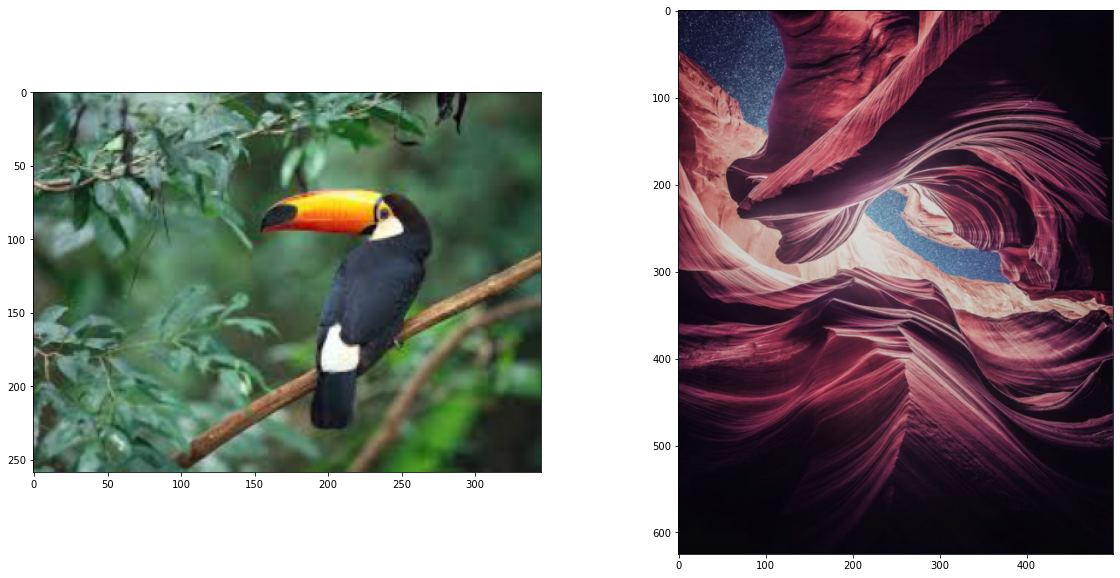

In [29]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))

ax1.imshow(content_d)
ax2.imshow(style_d)

## Task 5 : Get content,style features and create gram matrix

In [42]:
def get_features(image,model):
    layers ={
        '0':'conv1_1',
        '5':'conv2_1',
        '10':'conv3_1',
        '19':'conv4_1',
        '21':'conv4_2', # content features
        '28':'conv5_1' # style features
    }
    
    x=image
    features={}
    
    for name,layer in model._modules.items():
        x=layer(x)
        if name in layers:
            features[layers[name]]=x   
    return features
        

In [43]:
content_f = get_features(content_p,vgg)
style_f = get_features(style_p,vgg)

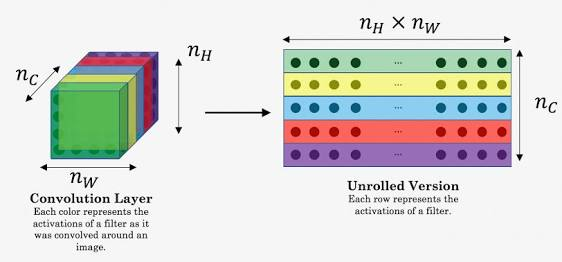

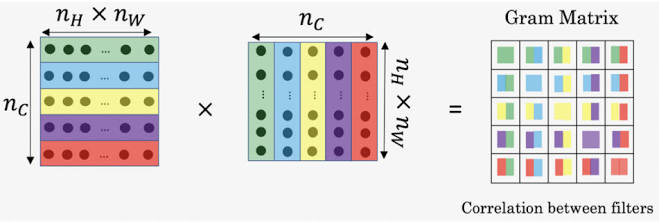

In [44]:
def gram_metrix(tensor):
    b,c,h,w = tensor.size()
    tensor = tensor.view(c,h*w)
    gram = torch.mm(tensor,tensor.t())
    return gram

In [45]:
style_grams={layer:gram_metrix(style_f[layer]) for layer in style_f}

In [46]:
style_grams

{'conv1_1': tensor([[  6591.3452,   4106.3506,   4337.9404,  ...,    551.7061,
            1967.9062,   4242.2832],
         [  4106.3506, 181579.6094,   3408.6577,  ...,  31295.2266,
           45135.5547,  74811.0938],
         [  4337.9404,   3408.6577,   5252.0425,  ...,    232.3349,
            2553.4119,   5760.7539],
         ...,
         [   551.7061,  31295.2266,    232.3349,  ...,  60120.3359,
           34935.0898,  30554.0664],
         [  1967.9062,  45135.5547,   2553.4119,  ...,  34935.0898,
           61426.7344,  38730.9766],
         [  4242.2832,  74811.0938,   5760.7539,  ...,  30554.0664,
           38730.9766,  75924.8516]]),
 'conv2_1': tensor([[123408.7500,  14582.1895,  91896.4062,  ...,   3909.2126,
           22226.9180,  34196.8086],
         [ 14582.1895,  82467.6875,  45438.9805,  ...,  12178.8887,
           34635.3203,  21845.1113],
         [ 91896.4062,  45438.9805, 288161.1250,  ...,  23880.2480,
           11055.7891,  46387.5078],
         ...,
   

## Task 6 : Creating Style and Content loss function

In [47]:
def content_loss(target_conv4_2,content_conv4_2):
    loss=torch.mean((target_conv4_2-content_conv4_2)**2)
    return loss
    

In [48]:
style_weights = {
    'conv1_1':1.0,
    'conv2_1':0.75,
    'conv3_1':0.2,
    'conv4_1':0.2,
    'conv5_1':0.2
}

In [49]:
def style_loss(style_weights,target_features,style_grams):
    loss = 0
    for layer in style_weights:
        target_f=target_features[layer]
        target_gram=gram_metrix(target_f)
        style_gram=style_grams[layer]
        b,c,h,w=target_f.shape
        layer_loss=style_weights[layer]*torch.mean((target_gram-style_gram)**2)
        loss+=layer_loss/(c*h*w)
        return loss

In [50]:
target=content_p.clone().requires_grad_(True).to(device)
target_f=get_features(target,vgg)
print("Content loss ", content_loss(target_f['conv4_2'],content_f['conv4_2']))
print("Style loss ", style_loss(style_weights,target_f,style_grams))

Content loss  tensor(0., grad_fn=<MeanBackward0>)
Style loss  tensor(669.7941, grad_fn=<AddBackward0>)


## Task 7 : Training loop

In [56]:
from torch import optim

optimizer=optim.Adam([target],lr=0.003)

alpha=1
beta=1e5

ephocs=2000

show_every = 500

In [57]:
def total_loss(c_loss,s_loss,alpha,beta):
    loss=alpha * c_loss + beta + s_loss
    return loss

In [58]:
results = []

for i in range(ephocs):
    target_f=get_features(target,vgg)
    c_loss = content_loss(target_f['conv4_2'],content_f['conv4_2'])
    s_loss = style_loss(style_weights,target_f,style_grams)
    t_loss = total_loss(c_loss,s_loss,alpha,beta)
    
    optimizer.zero_grad()
    t_loss.backward()
    optimizer.step()
    
    if i % show_every == 0:
        print("Total loss at ephoc {}:{}".format(i,t_loss))
        results.append(deprocess(target.detach()))

Total loss at ephoc 0:100296.7421875
Total loss at ephoc 500:100060.796875
Total loss at ephoc 1000:100035.4375
Total loss at ephoc 1500:100026.1640625


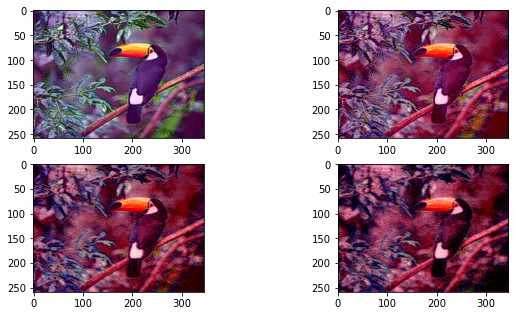

In [60]:
plt.figure(figsize=(10,8))


for i in range(len(results)):
    plt.subplot(3,2,i+1)
    plt.imshow(results[i])
plt.show()

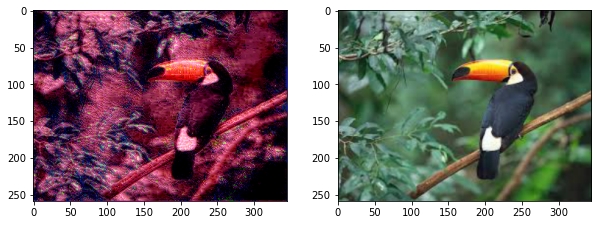

In [61]:
target_copy = deprocess(target.detach())
content_copy=deprocess(content_p)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.imshow(target_copy)
ax2.imshow(content_copy)